# Standardized Test Analysis

## Problem Statement

The ACT and SAT are both staples in the college admission process. 
They are widely recognised to be adequate representations of 'intelligence'. 
However, does each test per se accurately portray the level of 'intelligence' of candidates?

### Contents:
- [Background](#Background)
- [Data Import & Cleaning](#Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-Data)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

## Background

The SAT and ACT are standardized tests that many colleges and universities in the United States require for their admissions process. This score is used along with other materials such as grade point average (GPA) and essay responses to determine whether or not a potential student will be accepted to the university.

The SAT has two sections of the test: Evidence-Based Reading and Writing and Math ([*source*](https://www.princetonreview.com/college/sat-sections)). The ACT has 4 sections: English, Mathematics, Reading, and Science, with an additional optional writing section ([*source*](https://www.act.org/content/act/en/products-and-services/the-act/scores/understanding-your-scores.html)). They have different score ranges, which you can read more about on their websites or additional outside sources (a quick Google search will help you understand the scores for each test):
* [SAT](https://collegereadiness.collegeboard.org/sat)
* [ACT](https://www.act.org/content/act/en.html)

Standardized tests have long been a controversial topic for students, administrators, and legislators. Since the 1940's, an increasing number of colleges have been using scores from sudents' performances on tests like the SAT and the ACT as a measure for college readiness and aptitude ([*source*](https://www.minotdailynews.com/news/local-news/2017/04/a-brief-history-of-the-sat-and-act/)). Supporters of these tests argue that these scores can be used as an objective measure to determine college admittance. Opponents of these tests claim that these tests are not accurate measures of students potential or ability and serve as an inequitable barrier to entry. Lately, more and more schools are opting to drop the SAT/ACT requirement for their Fall 2021 applications ([*read more about this here*](https://www.cnn.com/2020/04/14/us/coronavirus-colleges-sat-act-test-trnd/index.html)).

No other background or information was conducted for the purpose of this project.

### Datasets used:
* [`act_2017.csv`](./data/act_2017.csv): 2017 ACT Scores by State
* [`act_2018.csv`](./data/act_2018.csv): 2018 ACT Scores by State
* [`act_2019.csv`](./data/act_2019.csv): 2019 ACT Scores by State
* [`sat_2017.csv`](./data/sat_2017.csv): 2017 SAT Scores by State
* [`sat_2018.csv`](./data/sat_2018.csv): 2018 SAT Scores by State
* [`sat_2019.csv`](./data/sat_2019.csv): 2019 SAT Scores by State

### Outside Research

For this project, no outside research or any additional background information was conducted in this analysis.

### Coding Challenges

1. Manually calculate mean:

    Write a function that takes in values and returns the mean of the values. Create a list of numbers that you test on your function to check to make sure your function works!
    
    *Note*: Do not use any mean methods built-in to any Python libraries to do this! This should be done without importing any additional libraries.

In [1]:
def mean_func(nums):
    if all(isinstance(i, (int, float)) for i in nums):
        return sum(nums)/len(nums)

print(mean_func([5, 6, 6, 5, 8]))
print(mean_func([5.9, 6.52, 6.44, 5.88, 8.9]))
print(mean_func([5.9, 6.52, 'asd', 5.88, 8.9]))

6.0
6.728
None


2. Manually calculate standard deviation:

    The formula for standard deviation is below:

    $$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

    Where $x_i$ represents each value in the dataset, $\mu$ represents the mean of all values in the dataset and $n$ represents the number of values in the dataset.

    Write a function that takes in values and returns the standard deviation of the values using the formula above. Hint: use the function you wrote above to calculate the mean! Use the list of numbers you created above to test on your function.
    
    *Note*: Do not use any standard deviation methods built-in to any Python libraries to do this! This should be done without importing any additional libraries.

In [2]:
def sd_func(nums):
    cum_diff = 0
    if all(isinstance(i, (int, float)) for i in nums):
        for i in nums:
            cum_diff += (i - mean_func(nums)) ** 2
        return (cum_diff/len(nums))**0.5

print(sd_func([5, 6, 6, 5, 8]))
print(sd_func([5.9, 6.52, 6.44, 5.88, 8.9]))
print(sd_func([5.9, 6.52, 'asd', 5.88, 8.9]))

1.0954451150103321
1.1178980275499193
None


3. Data cleaning function:
    
    Write a function that takes in a string that is a number and a percent symbol (ex. '50%', '30.5%', etc.) and converts this to a float that is the decimal approximation of the percent. For example, inputting '50%' in your function should return 0.5, '30.5%' should return 0.305, etc. Make sure to test your function to make sure it works!

You will use these functions later on in the project!

In [3]:
def conv_per(x):
    if x.count('.') <= 1 and x[:-1].replace('.', '').isdigit() and x[-1] == '%':
        return float(x.replace('%','')) /100

print(conv_per('37%'))
print(conv_per('5.32%'))
print(conv_per('%ds'))
print(conv_per('%ds%'))

0.37
0.053200000000000004
None
None


*All libraries used should be added here*

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from functools import reduce

## Data Import and Cleaning

### Data Import & Cleaning

Import the datasets that you selected for this project and go through the following steps at a minimum. You are welcome to do further cleaning as you feel necessary:
1. Display the data: print the first 5 rows of each dataframe to your Jupyter notebook.
2. Check for missing values.
3. Check for any obvious issues with the observations (keep in mind the minimum & maximum possible values for each test/subtest).
4. Fix any errors you identified in steps 2-3.
5. Display the data types of each feature.
6. Fix any incorrect data types found in step 5.
    - Fix any individual values preventing other columns from being the appropriate type.
    - If your dataset has a column of percents (ex. '50%', '30.5%', etc.), use the function you wrote in Part 1 (coding challenges, number 3) to convert this to floats! *Hint*: use `.map()` or `.apply()`.
7. Rename Columns.
    - Column names should be all lowercase.
    - Column names should not contain spaces (underscores will suffice--this allows for using the `df.column_name` method to access columns in addition to `df['column_name']`).
    - Column names should be unique and informative.
8. Drop unnecessary rows (if needed).
9. Merge dataframes that can be merged.
10. Perform any additional cleaning that you feel is necessary.
11. Save your cleaned and merged dataframes as csv files.

21     2.3
29    18.2
25    18.8
41    18.9
34    19.3
Name: Science, dtype: float64

20     52
8     468
7     492
12    493
22    495
Name: Math, dtype: int64

State             object
Participation     object
Composite        float64
dtype: object

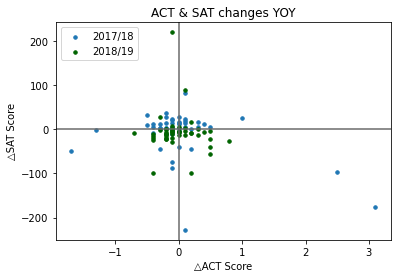

In [5]:
act2017 = pd.read_csv('act_2017.csv')
act2018 = pd.read_csv('act_2018.csv')
act2019 = pd.read_csv('act_2019.csv')
sat2017 = pd.read_csv('sat_2017.csv')
sat2018 = pd.read_csv('sat_2018.csv')
sat2019 = pd.read_csv('sat_2019.csv')

## Step 1: Display the data: print the first 5 rows of each dataframe to your Jupyter notebook.

# display(act2017.head())
# display(act2018.head())
# display(act2019.head())
# display(sat2017.head())
# display(sat2018.head())
# display(sat2019.head())


## Step 2: Check for missing values.
# Answer: No null objects

# display(act2017.isnull().sum())
# display(act2018.isnull().sum())
# display(act2019.isnull().sum())
# display(sat2017.isnull().sum())
# display(sat2018.isnull().sum())
# display(sat2019.isnull().sum())


## Step 3: Check for any obvious issues with the observations (keep in mind the minimum & maximum possible values for each test/subtest).
# Noticeable outliers: act2017 Science min, sat2017 Math min
# act2017 format different, sat2019 column name different
# following SAT years may have removed outliers themselves

# display(act2017.describe())
# display(act2018.describe())
# display(act2019.describe())
# display(sat2017.describe())
# display(sat2018.describe())
# display(sat2019.describe())


## Step 4: Fix any errors you identified in steps 2-3.

# removing outliers
# act2017
display(act2017['Science'].sort_values().head())
act2017 = act2017.drop(21)
# sat2017
display(sat2017['Math'].sort_values().head())
sat2017 = sat2017.drop(20)
# standardising act formats
act2017 = act2017[['State', 'Participation', 'Composite']]
# standardising sat formats
sat2017.rename(columns={'Evidence-Based Reading and Writing': 'EBRW'}, inplace=True)
sat2018.rename(columns={'Evidence-Based Reading and Writing': 'EBRW'}, inplace=True)
sat2019.rename(columns={'Participation Rate': 'Participation'}, inplace=True)


## Step 5: Display the data types of each feature.

# display(act2017.dtypes)
# display(act2018.dtypes)
# display(act2019.dtypes)
# display(sat2017.dtypes)
# display(sat2018.dtypes)
# display(sat2019.dtypes)


## Step 6: Fix any incorrect data types found in step 5.

# editing 'Composite' dtype: object > float 
# typo in act2017
act2017.at[51,'Composite'] = act2017.at[51,'Composite'].replace('x','')
act2017['Composite'] = act2017['Composite'].astype('float')
display(act2017.dtypes)

# converting all participation to floats
act2017['Participation'] = act2017['Participation'].apply(conv_per)
act2018['Participation'] = act2018['Participation'].apply(conv_per)
act2019['Participation'] = act2019['Participation'].apply(conv_per)
sat2017['Participation'] = sat2017['Participation'].apply(conv_per)
sat2018['Participation'] = sat2018['Participation'].apply(conv_per)
sat2019['Participation'] = sat2019['Participation'].apply(conv_per)


## Step 7: Rename Columns.
# column names lower case
act2017.columns = act2017.columns.str.lower()
act2018.columns = act2018.columns.str.lower()
act2019.columns = act2019.columns.str.lower()
sat2017.columns = sat2017.columns.str.lower()
sat2018.columns = sat2018.columns.str.lower()
sat2019.columns = sat2019.columns.str.lower()


## Step 8: Drop unnecessary rows (if needed).
# Rows done in step 4
# only interested in total scores and states so columns removed
sat2017 = sat2017.drop(columns=['ebrw', 'math'])
sat2018 = sat2018.drop(columns=['ebrw', 'math'])
sat2019 = sat2019.drop(columns=['ebrw', 'math'])


## Step 9: Merge dataframes that can be merged.
# since only interested in changes in score, participation rate is removed.
act2017.rename(columns={'composite':'total_act2017'}, inplace = True)
act2018.rename(columns={'composite':'total_act2018'}, inplace = True)
act2019.rename(columns={'composite':'total_act2019'}, inplace = True)
sat2017.rename(columns={'total':'total_sat2017'}, inplace = True)
sat2018.rename(columns={'total':'total_sat2018'}, inplace = True)
sat2019.rename(columns={'total':'total_sat2019'}, inplace = True)

act2017.rename(columns={'participation':'part_act2017'}, inplace = True)
act2018.rename(columns={'participation':'part_act2018'}, inplace = True)
act2019.rename(columns={'participation':'part_act2019'}, inplace = True)
sat2017.rename(columns={'participation':'part_sat2017'}, inplace = True)
sat2018.rename(columns={'participation':'part_sat2018'}, inplace = True)
sat2019.rename(columns={'participation':'part_sat2019'}, inplace = True)


# merging all 6 dataframes together
dataframes = [act2017, act2018, act2019, sat2017, sat2018, sat2019]
merged_dfs = reduce(lambda left,right: pd.merge(left,right,on=['state'],how='outer'), dataframes)


## Step 10: Perform any additional cleaning that you feel is necessary.

# Drop all rows with null values & duplicates
merged_dfs = merged_dfs.dropna()
merged_dfs = merged_dfs.drop_duplicates()
# Creating score difference columns for analysis
merged_dfs['act_diff1718'] = merged_dfs['total_act2018'] - merged_dfs['total_act2017']
merged_dfs['act_diff1819'] = merged_dfs['total_act2019'] - merged_dfs['total_act2018']
merged_dfs['sat_diff1718'] = merged_dfs['total_sat2018'] - merged_dfs['total_sat2017']
merged_dfs['sat_diff1819'] = merged_dfs['total_sat2019'] - merged_dfs['total_sat2018']

############################################
# For EDA - Discovering Trends
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(merged_dfs['act_diff1718'], merged_dfs['sat_diff1718'], label = '2017/18', s = 12)
ax1.scatter(merged_dfs['act_diff1819'], merged_dfs['sat_diff1819'], label = '2018/19', c = 'darkgreen', s = 12)
ax1.axvline(x=0, color ='dimgray')
ax1.axhline(y=0, color ='dimgray')
plt.title('ACT & SAT changes YOY')
plt.xlabel('△ACT Score')
plt.ylabel('△SAT Score')
plt.legend(loc='upper left')
plt.show()
############################################

# removing outliers of merged_dfs
# probably too many in reality, cannot be dropping 7/50 of the sample.
merged_dfs = merged_dfs.drop(6)
merged_dfs = merged_dfs.drop(10)
merged_dfs = merged_dfs.drop(12)
merged_dfs = merged_dfs.drop(14)
merged_dfs = merged_dfs.drop(37)
merged_dfs = merged_dfs.drop(45)
merged_dfs = merged_dfs.drop(49)

def pos_or_neg(i):
    if i > 0:
        return 1
    elif i < 0:
        return -1
    else:
        return 0

# creating a new column to simplify positive or negative
merged_dfs['act_sign1718'] = merged_dfs['act_diff1718'].apply(pos_or_neg)
merged_dfs['act_sign1819'] = merged_dfs['act_diff1819'].apply(pos_or_neg)
merged_dfs['sat_sign1718'] = merged_dfs['sat_diff1718'].apply(pos_or_neg)
merged_dfs['sat_sign1819'] = merged_dfs['sat_diff1819'].apply(pos_or_neg)


# Step 11: Save your cleaned and merged dataframes as csv files.
merged_dfs.to_csv('merged_actsat.csv')


**Data Dictionary** 

|Feature|Type|Dataset|Description|
|---|---|---|---|
|state|object|ACT/SAT|The State where recorded scores are from| 
|total_act2017|float|ACT|Average total ACT score from the year 2017|
|total_act2018|float|ACT|Average total ACT score from the year 2018|
|total_act2019|float|ACT|Average total ACT score from the year 2019|
|total_sat2017|float|SAT|Average total SAT score from the year 2017|
|total_sat2018|float|SAT|Average total SAT score from the year 2018|
|total_sat2019|float|SAT|Average total SAT score from the year 2019|
|act_diff1718|float|ACT|Difference of ACT score for years 2017 and 2018|
|act_diff1819|float|ACT|Difference of ACT score for years 2018 and 2019|
|sat_diff1718|float|SAT|Difference of SAT score for years 2017 and 2018|
|sat_diff1819|float|SAT|Difference of SAT score for years 2018 and 2019|
|act_sign1718|int|ACT|Sign of ACT score difference for years 2017 and 2018. 1 for positive & -1 for negative|
|act_sign1819|int|ACT|Sign of ACT score difference for years 2018 and 2019. 1 for positive & -1 for negative|
|sat_sign1718|int|SAT|Sign of SAT score difference for years 2017 and 2018. 1 for positive & -1 for negative|
|sat_sign1819|int|SAT|Sign of SAT score difference for years 2018 and 2019. 1 for positive & -1 for negative|




## Exploratory Data Analysis

,part_act2017,total_act2017,part_act2018,total_act2018,part_act2019,total_act2019,part_sat2017,total_sat2017,part_sat2018,total_sat2018,part_sat2019,total_sat2019,act_diff1718,act_diff1819,sat_diff1718,sat_diff1819,act_sign1718,act_sign1819,sat_sign1718,sat_sign1819
count,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000
mean,0.629286,21.633333,0.617143,21.514286,0.592143,21.469048,0.399762,1134.095238,0.431905,1139.047619,0.439762,1130.047619,-0.119048,-0.045238,4.952381,-9.000000,-0.285714,-0.309524,0.547619,-0.595238
std,0.327044,2.066181,0.352823,2.148121,0.357338,2.242330,0.351904,92.392009,0.372259,91.611575,0.375509,91.321184,0.424401,0.288987,19.631921,12.207555,0.863507,0.896826,0.832346,0.798154
min,0.080000,17.800000,0.070000,17.700000,0.060000,17.900000,0.020000,996.000000,0.020000,998.000000,0.020000,985.000000,-1.700000,-0.700000,-50.000000,-40.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,0.310000,19.850000,0.262500,20.000000,0.222500,19.800000,0.040000,1057.500000,0.040000,1071.000000,0.042500,1064.250000,-0.300000,-0.200000,1.000000,-15.750000,-1.000000,-1.000000,1.000000,-1.000000
50%,0.655000,21.600000,0.665000,21.300000,0.645000,21.150000,0.405000,1111.000000,0.455000,1117.000000,0.460000,1109.000000,-0.100000,-0.100000,6.000000,-8.500000,-1.000000,-1.000000,1.000000,-1.000000
75%,1.000000,23.675000,1.000000,23.650000,1.000000,23.900000,0.650000,1225.000000,0.700000,1234.750000,0.707500,1229.000000,0.075000,0.100000,15.750000,-4.000000,0.750000,1.000000,1.000000,-1.000000
max,1.000000,25.500000,1.000000,25.600000,1.000000,25.500000,1.000000,1295.000000,1.000000,1298.000000,1.000000,1284.000000,1.000000,0.800000,38.000000,28.000000,1.000000,1.000000,1.000000,1.000000


{'part_act2017': 0.3231275205825451,
 'total_act2017': 2.0414358470107055,
 'part_act2018': 0.3485977741800215,
 'total_act2018': 2.1223943608880167,
 'part_act2019': 0.35305830972804936,
 'total_act2019': 2.215474591233015,
 'part_sat2017': 0.34768957210240403,
 'total_sat2017': 91.2854783016052,
 'part_sat2018': 0.36780065832328057,
 'total_sat2018': 90.51439043203818,
 'part_sat2019': 0.3710120527835418,
 'total_sat2019': 90.22747770178607,
 'act_diff1718': 0.4193180945285962,
 'act_diff1819': 0.2855257314335394,
 'sat_diff1718': 19.396799418058617,
 'sat_diff1819': 12.061351104921474,
 'act_sign1718': 0.8531653746270914,
 'act_sign1819': 0.8860854317108762,
 'sat_sign1718': 0.8223769542462163,
 'sat_sign1819': 0.7885950076990089}

act_sign1718  sat_sign1718
-1            -1               5
               0               1
               1              17
 0            -1               3
               1               5
 1            -1               1
               1              10
dtype: int64

act_sign1819  sat_sign1819
-1            -1              20
               1               5
 0            -1               4
               1               1
 1            -1               9
               0               1
               1               2
dtype: int64

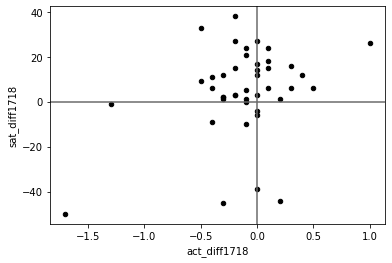

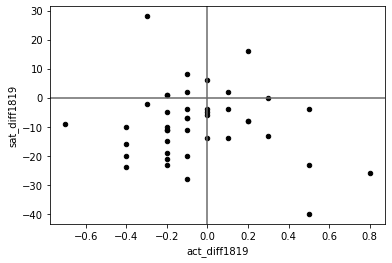

In [6]:
# Step 1: Summary Statistics.
display(merged_dfs.describe())


# Step 2: Use a dictionary comprehension to apply the standard deviation function you create in part 1 to each numeric column in the dataframe. No loops.
sd = {col.name: sd_func(col) for col in [merged_dfs[i] for i in merged_dfs.columns if (merged_dfs[i].dtype=='float64') or (merged_dfs[i].dtype=='int64')]}
display(sd)
# to double check
# sd2 = {col.name: np.std(col) for col in [merged_dfs[i] for i in merged_dfs.columns if (merged_dfs[i].dtype=='float64') or (merged_dfs[i].dtype=='int64')]}
# display(sd)


# Step 3: Investigate trends in the data.
display(merged_dfs.groupby(["act_sign1718", "sat_sign1718"]).size())
display(merged_dfs.groupby(["act_sign1819", "sat_sign1819"]).size())
# results are unexpected
# For years 2017 and 2018, 42.86% (18 out of 42) states scores were opposite directions
# For years 2018 and 2019, 33.33% (14 out of 42) states scores were opposite directions

# raw data plot done in Data Import & Cleaning Part 10

# 2017 vs 2018 - large cluster of +ve SAT change with -ve ACT change
plot_diff1718 = merged_dfs[['act_diff1718', 'sat_diff1718']]
plot1 = plot_diff1718.plot(kind='scatter', x='act_diff1718', y='sat_diff1718', color = 'black')
plot1.axvline(x=0, color ='dimgray')
plot1.axhline(y=0, color ='dimgray')
# 2018 vs 2019 - significant no. of data points that refute theory of large magnitude
plot_diff1819 = merged_dfs[['act_diff1819', 'sat_diff1819']]
plot2 = plot_diff1819.plot(kind='scatter', x='act_diff1819', y='sat_diff1819', color = 'black')
plot2.axvline(x=0, color ='dimgray')
plot2.axhline(y=0, color ='dimgray')



**To-Do:** *Edit this cell with your findings on trends in the data (step 3 above).*

<AxesSubplot:title={'center':'Heatmap - Correlation between columns'}>

C:\Users\assau\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\assau\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\assau\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

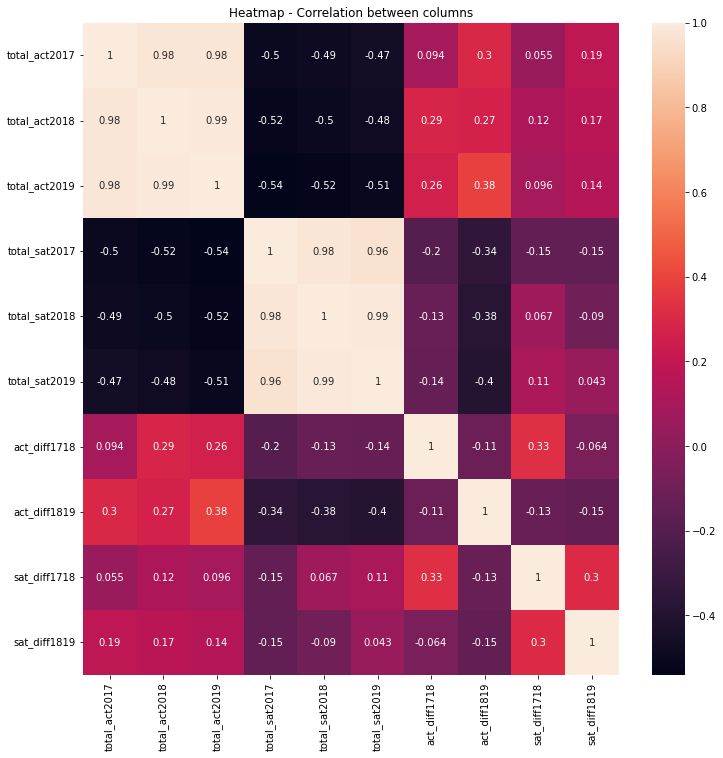

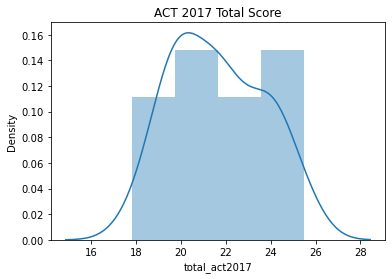

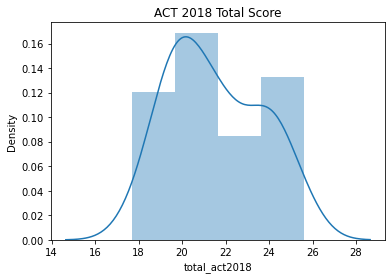

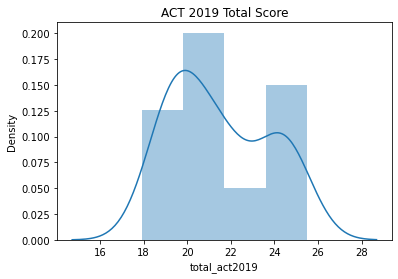

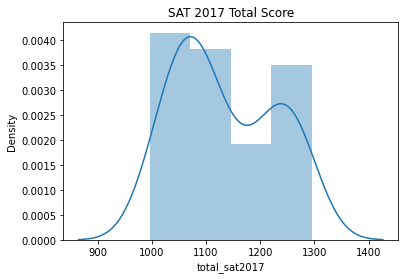

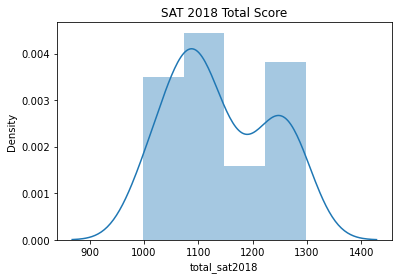

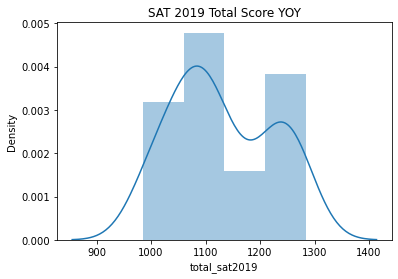

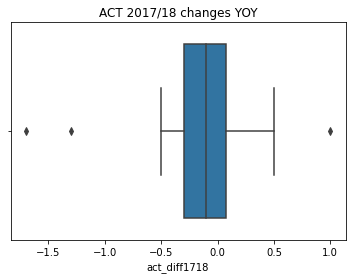

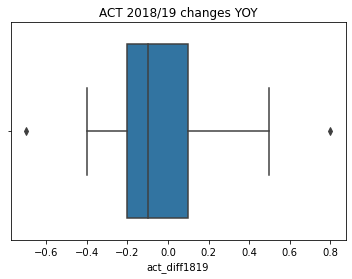

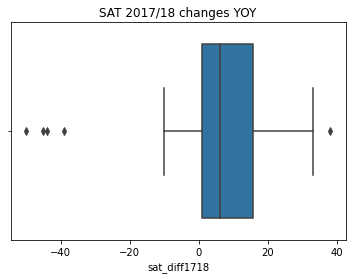

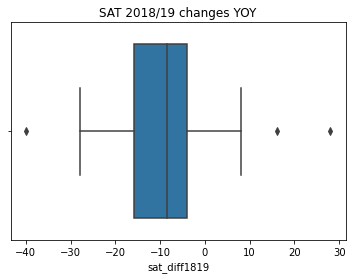

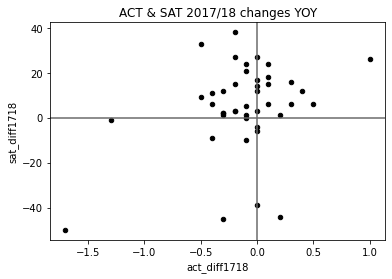

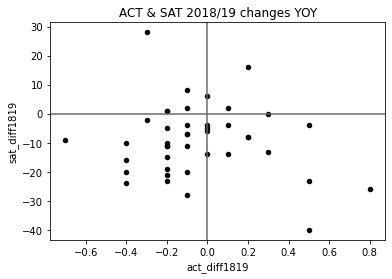

In [7]:
### EDA
# visualize correlations between all numeric features.
plt.figure(figsize=(12,12))
plt.title('Heatmap - Correlation between columns')
hm_data = merged_dfs[['total_act2017', 'total_act2018', 'total_act2019', 'total_sat2017', 'total_sat2018', 'total_sat2019', 'act_diff1718', 'act_diff1819','sat_diff1718','sat_diff1819']]
display(sns.heatmap(hm_data.corr(),annot=True))
# Only significant correlations are ACT scores year to year, and SAT scores year to year SEPARATELY

# Checking if score distributions can be reasonably assumed to be similarly distributed every year
plt.figure()
plt.title('ACT 2017 Total Score')
sns.distplot(merged_dfs.total_act2017)
# Distribution slightly skewed left
plt.figure()
plt.title('ACT 2018 Total Score')
sns.distplot(merged_dfs.total_act2018)
# Distribution slightly skewed left, similar to previous year ACT 2017
plt.figure()
plt.title('ACT 2019 Total Score')
sns.distplot(merged_dfs.total_act2019)
# Distribution slightly skewed left, similar to previous years ACT 2017 and ACT 2018
plt.figure()
plt.title('SAT 2017 Total Score')
sns.distplot(merged_dfs.total_sat2017)
# Distribution slightly skewed left
plt.figure()
plt.title('SAT 2018 Total Score')
sns.distplot(merged_dfs.total_sat2018)
# Distribution slightly skewed left, similar to previous year SAT 2017
plt.figure()
plt.title('SAT 2019 Total Score YOY')
sns.distplot(merged_dfs.total_sat2019)
# Distribution slightly skewed left, similar to previous years SAT 2017 and SAT 2018


# Plot and interpret boxplots.
plt.figure()
plt.title('ACT 2017/18 changes YOY')
sns.boxplot(merged_dfs.act_diff1718, orient='v')
# Quartile 2 and 3 almost identical, range skewed right, median negative
plt.figure()
plt.title('ACT 2018/19 changes YOY')
sns.boxplot(merged_dfs.act_diff1819, orient='v')
# Median negative and closer to Q1
plt.figure()
plt.title('SAT 2017/18 changes YOY')
sns.boxplot(merged_dfs.sat_diff1718, orient='v')
# Median positive and closer to Q1 as well, most no. of outliers among comparisons
plt.figure()
plt.title('SAT 2018/19 changes YOY')
sns.boxplot(merged_dfs.sat_diff1819, orient='v')
# Median negative and closer to Q3, Q3 (75th percentile) is -ve


### Plot and interpret scatter plots to view relationships between features.
# 2017 vs 2018 - large cluster of +ve SAT change with -ve ACT change
plot_diff1718 = merged_dfs[['act_diff1718', 'sat_diff1718']]
plot1 = plot_diff1718.plot(kind='scatter', x='act_diff1718', y='sat_diff1718', color = 'black')
plt.title('ACT & SAT 2017/18 changes YOY')
plot1.axvline(x=0, color ='dimgray')
plot1.axhline(y=0, color ='dimgray')
# 2018 vs 2019 - significant no. of data points that refute theory of large magnitude
plot_diff1819 = merged_dfs[['act_diff1819', 'sat_diff1819']]
plot2 = plot_diff1819.plot(kind='scatter', x='act_diff1819', y='sat_diff1819', color = 'black')
plt.title('ACT & SAT 2018/19 changes YOY')
plot2.axvline(x=0, color ='dimgray')
plot2.axhline(y=0, color ='dimgray')

## Conclusions and Recommendations

**Conclusion:**
The ACT and SAT individually may not accurately represent a candidate’s abilities.
Candidates can take both tests and apply with the better test score only.

**Recommendations:**
Academic Institutions can require both tests scores collectively to gain a more accurate representation of a candidate’s capabilities.
Consider other matrices/methods to assess candidates.